# Global Processing using the Hough Transform (HT)

`Task # 01 Apply the Hough Tranform (HT) on a color image for detecting straight lines.`

*   Write your observations by changing the threshold on the accumulation votes.

In [ ]:
# Import necessary libraries/packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Load your input image(s)
!gdown 1SYPlE-N9TqRrZ7nFcixBfgFQ7mAFyH4L
# !gdown 1DlJOsGmg9XBgD7-EmJySk5V9qo_RjcNb

Downloading...
From: https://drive.google.com/uc?id=1SYPlE-N9TqRrZ7nFcixBfgFQ7mAFyH4L
To: /content/image.jpg
100% 498k/498k [00:00<00:00, 58.9MB/s]


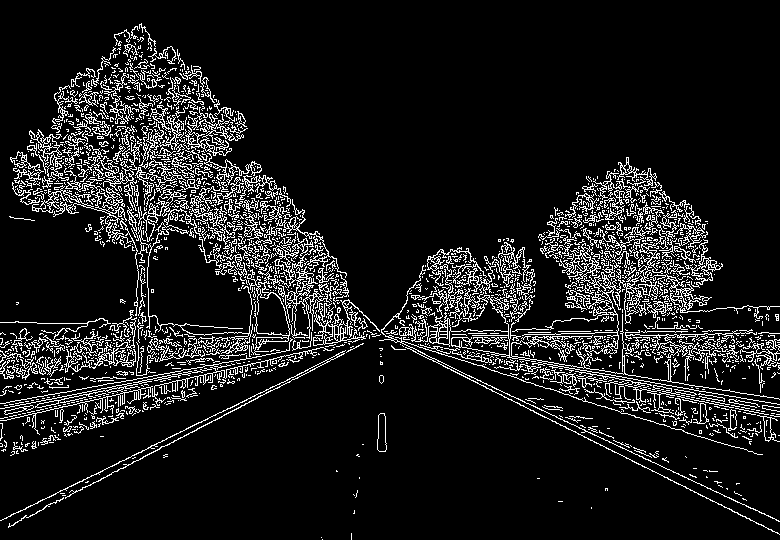

In [ ]:
img = cv2.imread('image.jpg')

# Resize image
img = cv2.resize(img, (780, 540),
               interpolation = cv2.INTER_LINEAR)

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image [Very Important preprocessing task]
# This will give a single-pixel thick edges
# Change the Lower and Upper thresholds and observe the changes
edges = cv2.Canny(gray, 100, 150, apertureSize=3)

cv2_imshow(edges)

**Descrption:** Apply the HT technique for Line detection.

In [ ]:
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 315) # Accumulator threshold =350.

**Description:** Draw the detected straight lines

In [ ]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
lines = np.array(lines)

print(lines.shape)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


(5, 1, 2)


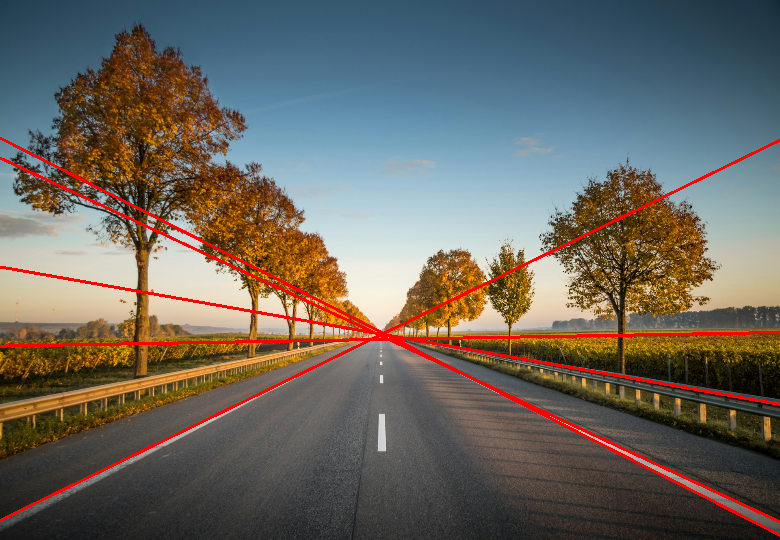

In [ ]:
cv2_imshow(img)

`Task # 02 Generate the Hough/Accumulator Space using the rho-theta parameters.` **[Complete This Task]**

a. Vote in the parameter space.

b. Display the Hough/Accumulator space.

In [ ]:
img = cv2.imread('image.jpg')
img = cv2.resize(img, (780, 540), interpolation=cv2.INTER_LINEAR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 150, apertureSize=3)

In [ ]:
height, width = edges.shape
diag_len = int(np.sqrt(height**2 + width**2))

In [ ]:
rho_max = 2 * diag_len
theta_max = 180
accumulator = np.zeros((rho_max, theta_max), dtype=np.uint8)

In [ ]:
rhos = np.linspace(-diag_len, diag_len, rho_max)
thetas = np.deg2rad(np.arange(-90, 90))

# voting in Hough Space
y_idxs, x_idxs = np.where(edges > 0)

In [ ]:
# create accumulator array
for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for theta_idx in range(len(thetas)):
        theta = thetas[theta_idx]
        rho = int(x * np.cos(theta) + y * np.sin(theta)) + diag_len
        accumulator[rho, theta_idx] += 1

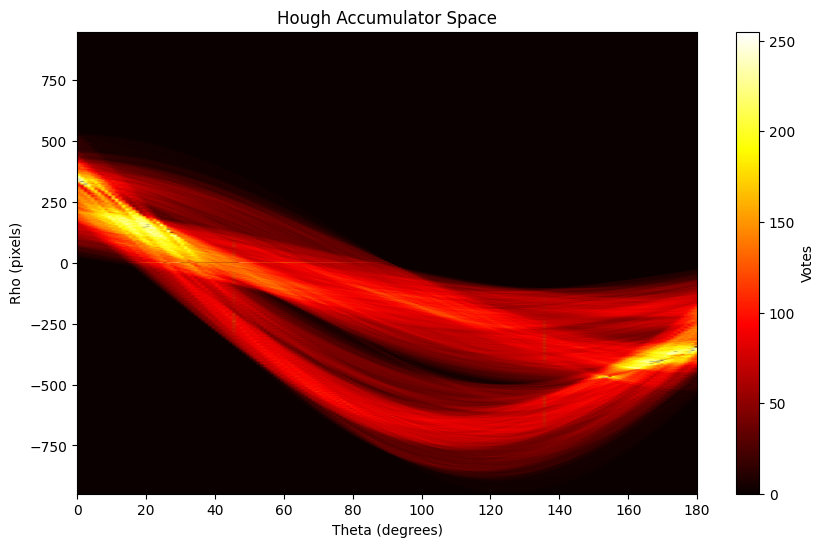

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(accumulator, cmap='hot', aspect='auto', extent=[0, 180, -diag_len, diag_len])
plt.colorbar(label='Votes')
plt.title('Hough Accumulator Space')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (pixels)')
plt.show()

`Task # 03 Display the detected straight lines` **[Home Assignment]**

a. Apply the Threshold on to the parameter space, and list the line parameters

b. Draw the lines on the input image.

In [ ]:
threshold = 250
line_indices = np.where(accumulator > threshold)

detected_lines = list(zip(line_indices[0], line_indices[1]))

In [ ]:
lines = [(rhos[rho_idx], thetas[theta_idx]) for rho_idx, theta_idx in detected_lines]

In [ ]:
for rho, theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

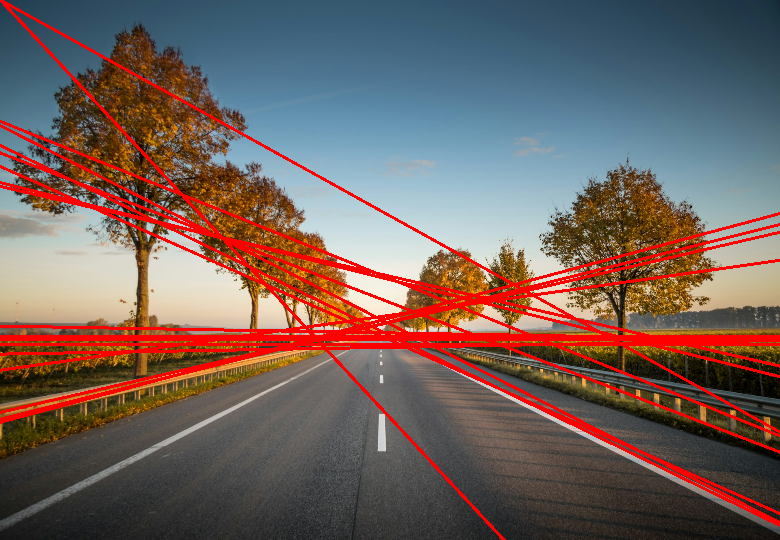

In [ ]:
cv2_imshow(img)

# Discussion
- With threshold closed to 0, the lines completely overflow the image.
- With increasing threshold, the lines lessen in number.